In [64]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [65]:
# 한글 폰트 사용 설정
import matplotlib
import matplotlib.font_manager as fm

fontpath = 'C:\\Windows\\Fonts\\batang.TTC'    # 폰트경로
font = fm.FontProperties(fname=fontpath).get_name()     # 이름을 가져옴
matplotlib.rc("font", family = font)    # 폰트설정 변경

In [66]:
df = pd.read_csv('./data/student-mat.csv')

## 1. 기본 데이터 확인

In [67]:
# 기본 로우 데이터

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [68]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [69]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## 2. y값 확인 및 분리

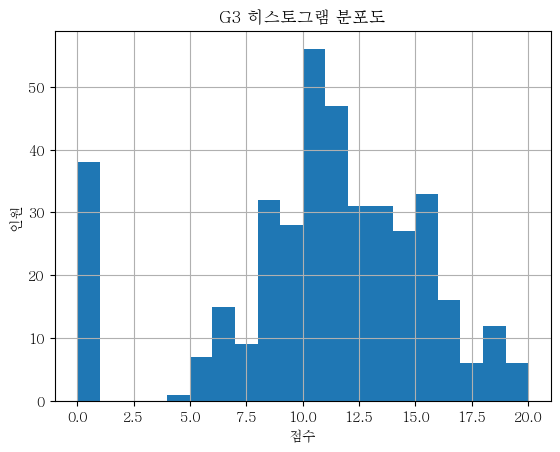

In [70]:
y = df['G3']

y.hist(bins=20)
plt.title('G3 히스토그램 분포도')
plt.ylabel('인원')
plt.xlabel('점수')
plt.show()

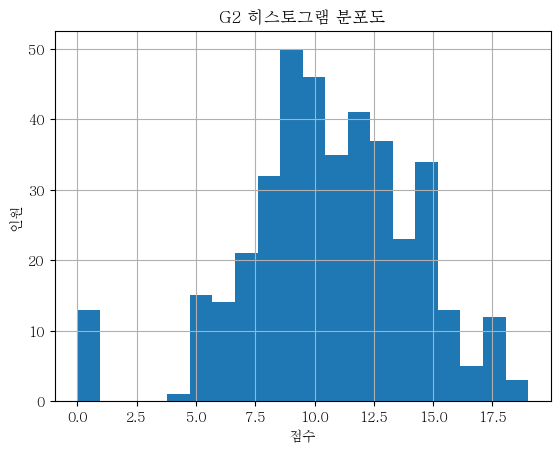

In [71]:
y2 = df['G2']

y2.hist(bins=20)
plt.title('G2 히스토그램 분포도')
plt.ylabel('인원')
plt.xlabel('점수')
plt.show()

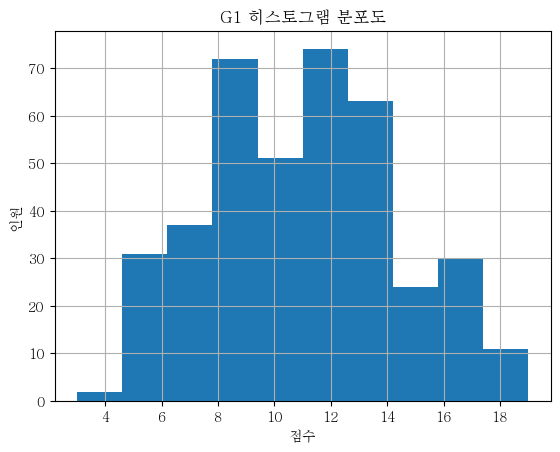

In [72]:
y = df['G1']

y.hist(bins=10)
plt.title('G1 히스토그램 분포도')
plt.ylabel('인원')
plt.xlabel('점수')
plt.show()

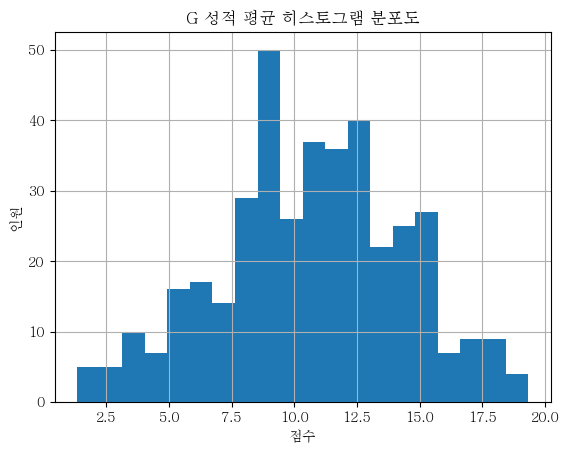

In [73]:

df['G_mean'] = round((df['G1']+df['G2']+df['G3'])/3,2)
y = df['G_mean']

y.hist(bins=20)
plt.title('G 성적 평균 히스토그램 분포도')
plt.ylabel('인원')
plt.xlabel('점수')
plt.show()

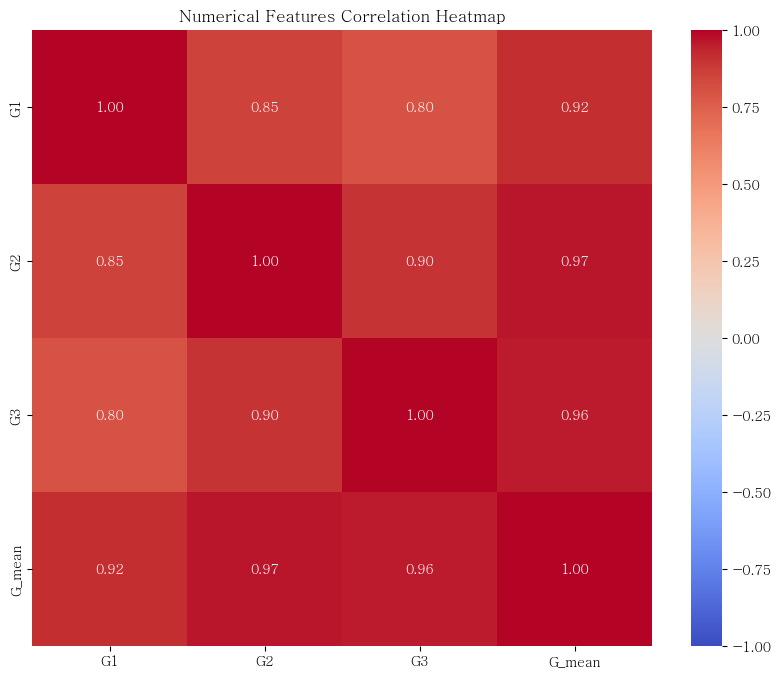

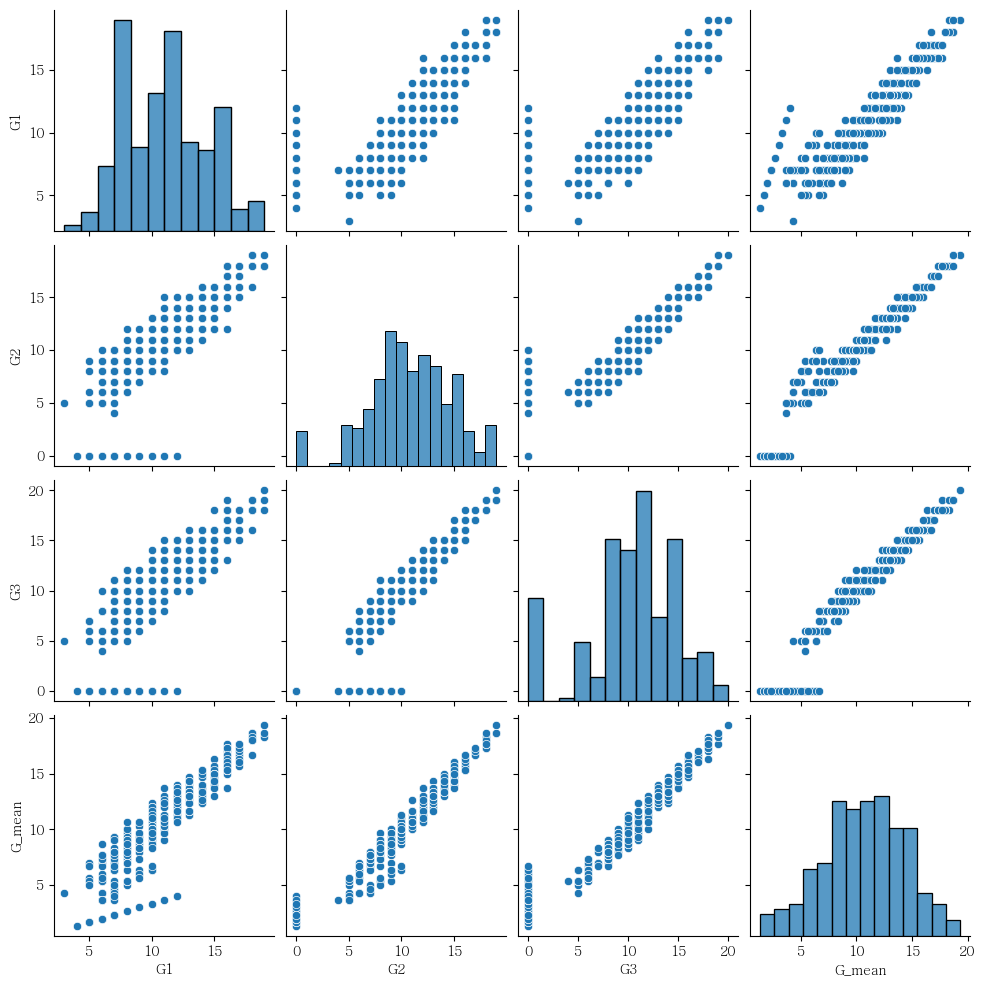

In [74]:
ys = df.iloc[:,-4:]

corr_m = ys.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_m, annot=True, fmt='.2f', cmap='coolwarm', cbar=True,vmin=-1, vmax=1)
plt.title('Numerical Features Correlation Heatmap')
sns.pairplot(ys)
plt.show()



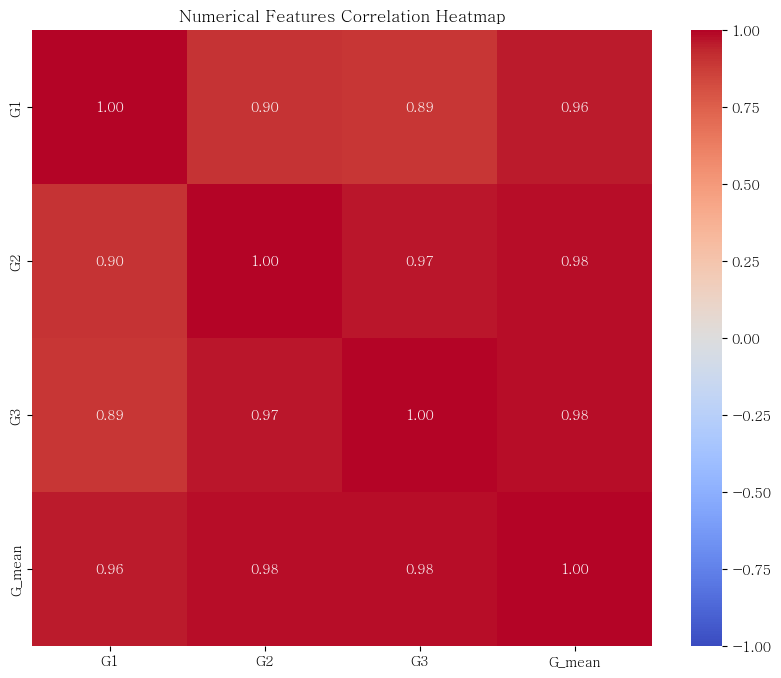

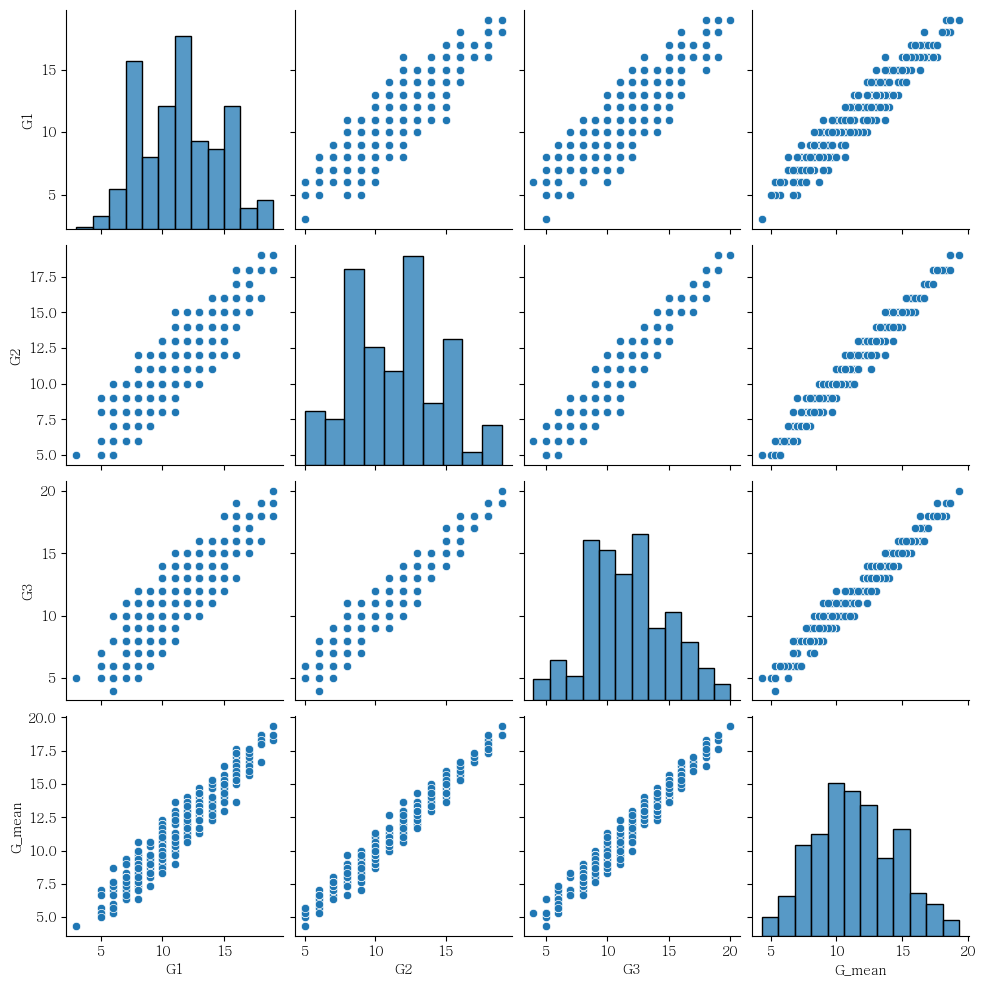

In [89]:
df = df[df['G3'] != 0].reset_index(drop=True)
df = df[df['G2'] != 0].reset_index(drop=True)

ys = df.iloc[:,-4:]

corr_m = ys.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_m, annot=True, fmt='.2f', cmap='coolwarm', cbar=True,vmin=-1, vmax=1)
plt.title('Numerical Features Correlation Heatmap')
sns.pairplot(ys)
plt.show()

<Axes: >

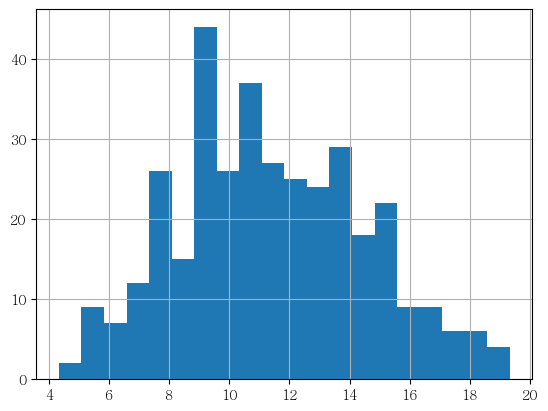

In [ ]:
df['G_mean'] =  round((df['G1']+df['G2']+df['G3'])/3,2)

df['G_mean'].hist(bins = 20)



## 3. 타입에 따라 X 컬럼 나누기 + 데이터 확인

In [77]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_mean
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.67
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.33
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.33
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.67
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.67


In [78]:
X=df.iloc[:,:-4]
# 범주형과
obj_cols = X.select_dtypes(include=['object']).columns
obj_cols
X_obj = df[obj_cols]


# 수치형
num_cols = X.select_dtypes(include=['int64']).columns
num_cols
X_num = df[num_cols]

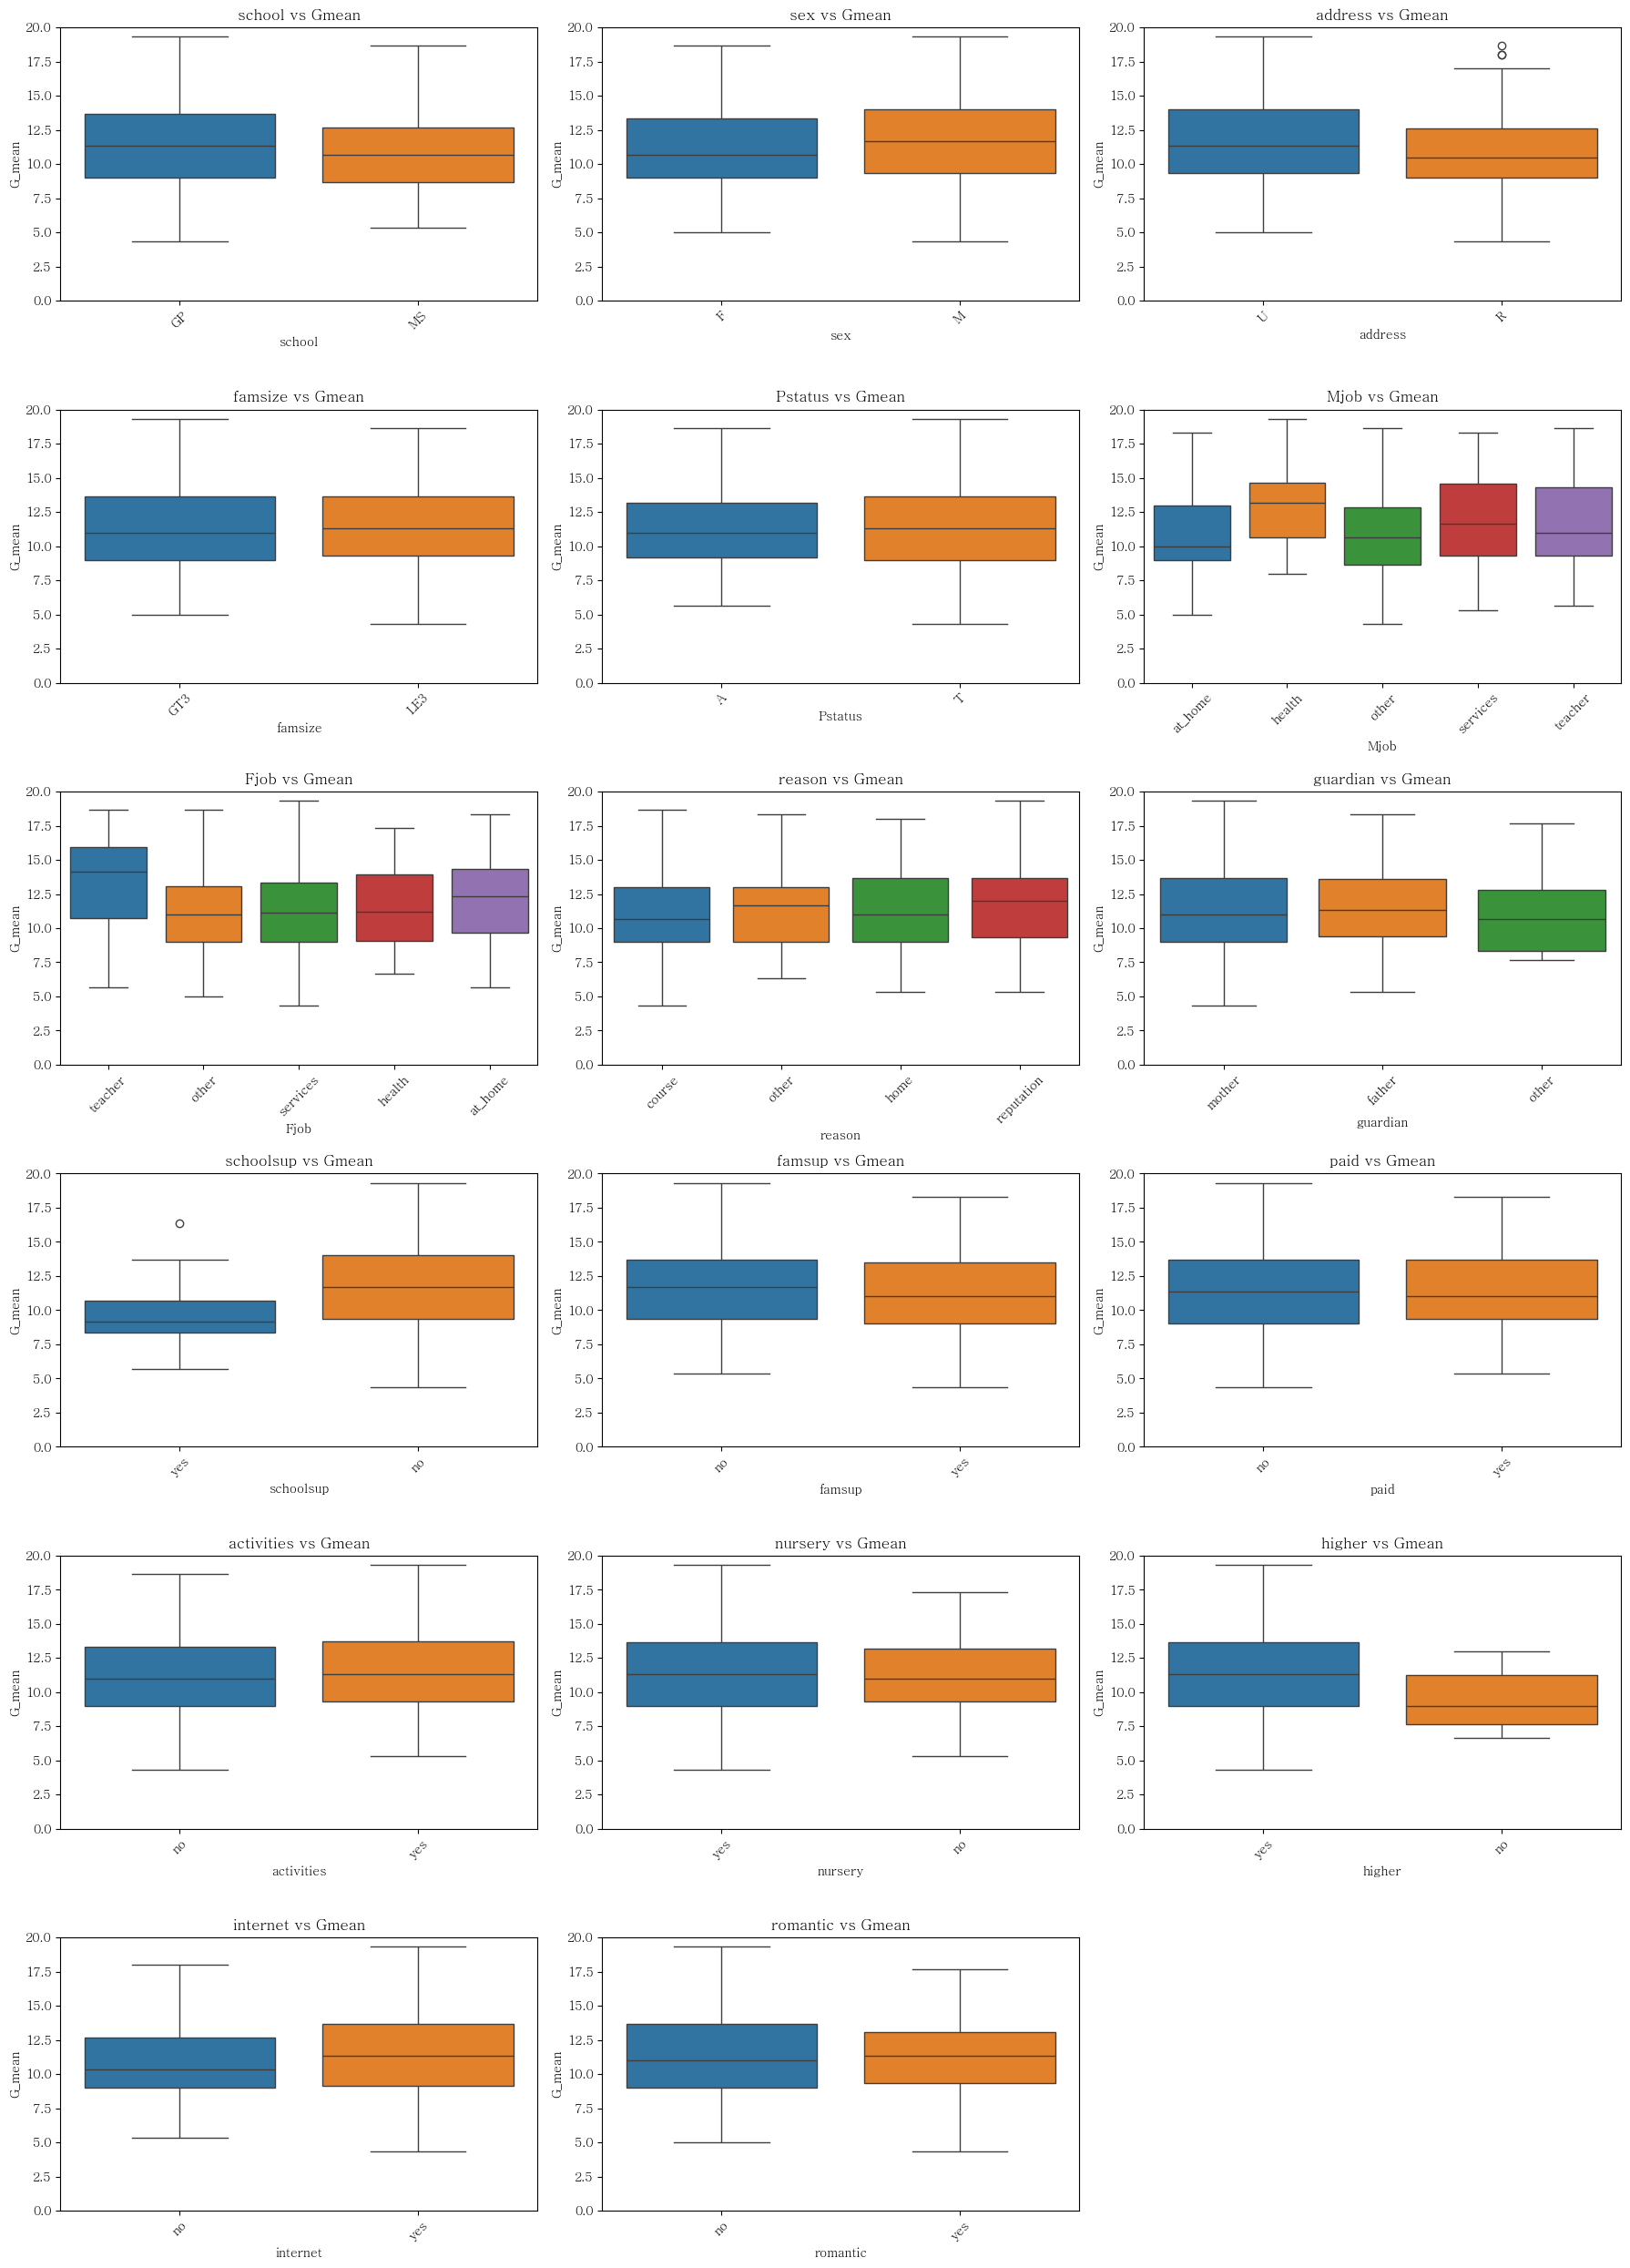

In [79]:
# 서브플롯 설정
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 25))  # 6x3 그리드, 총 18개 (17개 + 여유)
axes = axes.flatten()

# 범주형 변수별 Gmean 시각화
y_min = 0
y_max = 20

for i, col in enumerate(obj_cols):
    sns.boxplot(x=X_obj[col], y=df['G_mean'], ax=axes[i], hue=X_obj[col])
    axes[i].set_title(f'{col} vs Gmean')
    axes[i].set_ylim(y_min, y_max)  # Y축 범위를 동일하게 설정
    axes[i].tick_params(axis='x', rotation=45)  # X축 라벨 회전

# 빈 서브플롯 제거 (범주형 변수가 17개이므로 1개가 남음)
for j in range(len(obj_cols), len(axes)):
    fig.delaxes(axes[j])

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()


In [80]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()


# 범주형(categoricals) 인코딩
# 값이 2개인 것 라벨 인코딩 (1)

for _ in obj_cols:
    if len(df[_].value_counts())==2 :
        df[_]=label_encoder.fit_transform(df[_])

In [81]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_mean
0,0,0,18,1,0,0,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.67
1,0,0,17,1,0,1,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.33
2,0,0,15,1,1,1,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.33
3,0,0,15,1,0,1,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.67
4,0,0,16,1,0,1,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.67


In [82]:
# value 값이 3개 이상인 것들도 인코딩 (2)
df_encoded = pd.get_dummies(df, columns=['Mjob', 'Fjob', 'reason', 'guardian'], prefix=['Mjob', 'Fjob', 'reason', 'guardian'], drop_first=False)



In [83]:
df_encoded.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'G_mean', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

## 4. 스케일링

In [84]:
# X 스케일링 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


X = df_encoded.drop(['G1','G2','G3','G_mean'], axis=1)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [85]:
y = df_encoded[['G1','G2','G3','G_mean']]

X.head(), y.head()

(     school       sex       age   address   famsize   Pstatus      Medu  \
 0 -0.365148 -0.964225  1.061630  0.528744 -0.654217 -2.855494  1.102535   
 1 -0.365148 -0.964225  0.272043  0.528744 -0.654217  0.350202 -1.643547   
 2 -0.365148 -0.964225 -1.307132  0.528744  1.528545  0.350202 -1.643547   
 3 -0.365148 -0.964225 -1.307132  0.528744 -0.654217  0.350202  1.102535   
 4 -0.365148 -0.964225 -0.517545  0.528744 -0.654217  0.350202  0.187175   
 
        Fedu  traveltime  studytime  ...  Fjob_other  Fjob_services  \
 0  1.342740    0.829976  -0.050578  ...   -1.103355      -0.623783   
 1 -1.428117   -0.629637  -0.050578  ...    0.906327      -0.623783   
 2 -1.428117   -0.629637  -0.050578  ...    0.906327      -0.623783   
 3 -0.504498   -0.629637   1.153183  ...   -1.103355       1.603122   
 4  0.419121   -0.629637  -0.050578  ...    0.906327      -0.623783   
 
    Fjob_teacher  reason_course  reason_home  reason_other  reason_reputation  \
 0      3.568020       1.354006  

## 5. 데이터 마무리 및 저장

In [86]:
df_fin = pd.concat([X,y], axis=1)

df_fin.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,G1,G2,G3,G_mean
0,-0.365148,-0.964225,1.061630,0.528744,-0.654217,-2.855494,1.102535,1.342740,0.829976,-0.050578,...,-0.610800,-0.32969,-0.619452,-0.54606,0.662960,-0.286039,5,6,6,5.67
1,-0.365148,-0.964225,0.272043,0.528744,-0.654217,0.350202,-1.643547,-1.428117,-0.629637,-0.050578,...,-0.610800,-0.32969,-0.619452,1.83130,-1.508386,-0.286039,5,5,6,5.33
2,-0.365148,-0.964225,-1.307132,0.528744,1.528545,0.350202,-1.643547,-1.428117,-0.629637,-0.050578,...,-0.610800,3.03315,-0.619452,-0.54606,0.662960,-0.286039,7,8,10,8.33
3,-0.365148,-0.964225,-1.307132,0.528744,-0.654217,0.350202,1.102535,-0.504498,-0.629637,1.153183,...,1.637196,-0.32969,-0.619452,-0.54606,0.662960,-0.286039,15,14,15,14.67
4,-0.365148,-0.964225,-0.517545,0.528744,-0.654217,0.350202,0.187175,0.419121,-0.629637,-0.050578,...,1.637196,-0.32969,-0.619452,1.83130,-1.508386,-0.286039,6,10,10,8.67


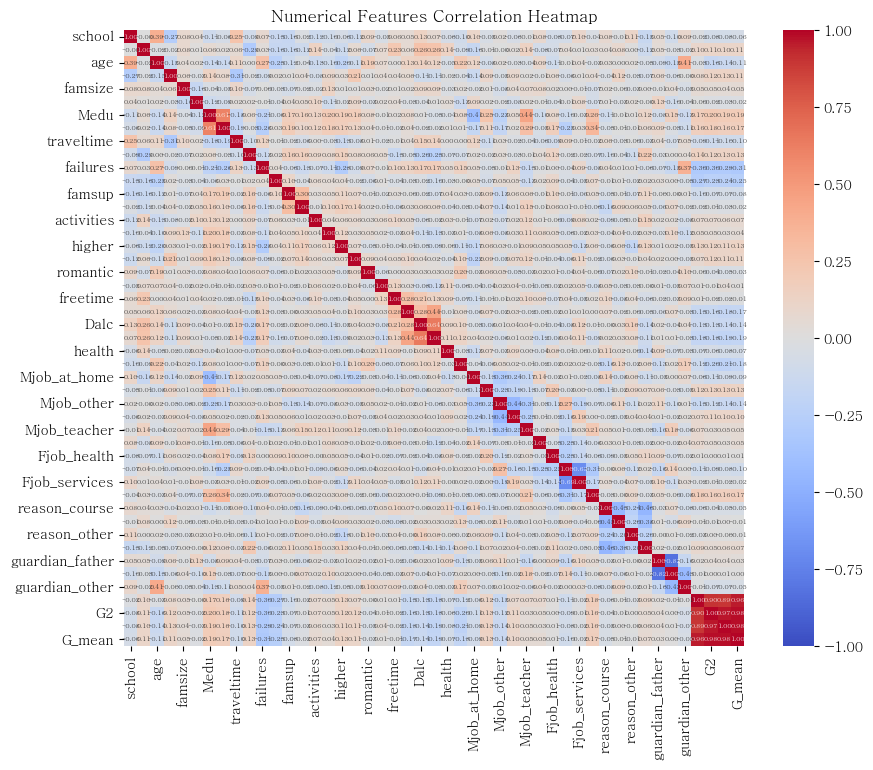

In [87]:
# 수치형 변수 간 상관계수
correlation_matrix = df_fin.corr()

# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,annot_kws={"size": 5}, fmt='.2f', cmap='coolwarm', cbar=True,vmin=-1, vmax=1)
plt.title('Numerical Features Correlation Heatmap')
plt.show()

In [88]:
df_fin.to_csv('./data/new preprocessed Data.csv', index=False)